# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct statistical tests on a real-world dataset

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [1]:
#Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
df = pd.read_csv('multipleChoiceResponses_cleaned.csv', encoding='latin1')
df.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26394 entries, 0 to 26393
Columns: 230 entries, GenderSelect to AdjustedCompensation
dtypes: float64(15), object(215)
memory usage: 46.3+ MB


## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

In [6]:
#Your code here
masters = df[df.FormalEducation=="Master's degree"]["AdjustedCompensation"].dropna()
bachelors = df[df.FormalEducation=="Bachelor's degree"]["AdjustedCompensation"].dropna()

In [17]:
masters.describe()

count    1.990000e+03
mean     6.913990e+04
std      1.355272e+05
min      0.000000e+00
25%      2.186800e+04
50%      5.381217e+04
75%      9.200000e+04
max      4.498900e+06
Name: AdjustedCompensation, dtype: float64

In [18]:
bachelors.describe()

count    1.107000e+03
mean     6.488710e+04
std      3.069359e+05
min      0.000000e+00
25%      1.126620e+04
50%      3.839940e+04
75%      8.023100e+04
max      9.999999e+06
Name: AdjustedCompensation, dtype: float64

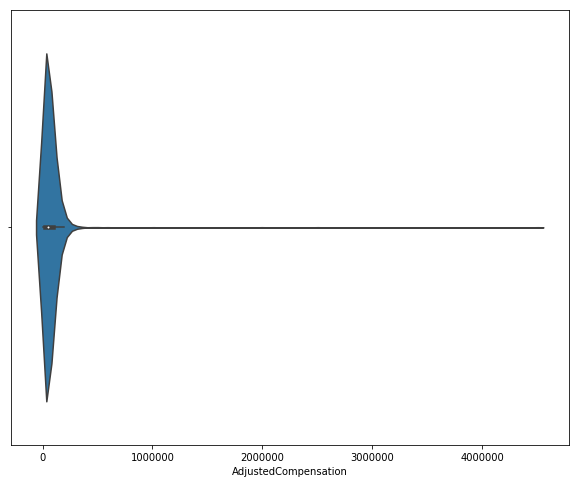

In [15]:
fig = plt.figure(figsize=(10,8))
sns.violinplot(masters)

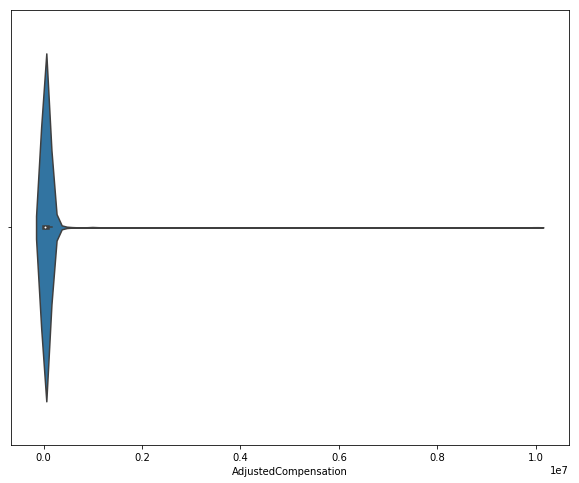

In [16]:
fig = plt.figure(figsize=(10,8))
sns.violinplot(bachelors)

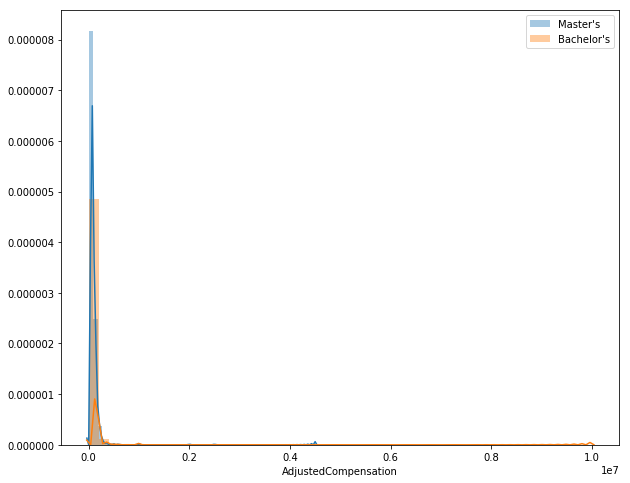

In [23]:
fig = plt.figure(figsize=(10,8))
sns.distplot(masters, label="Master's")
sns.distplot(bachelors, label="Bachelor's")
plt.legend();

In [24]:
from scipy import stats
""" Calculate Welch's t statistic for two samples. """
def welch_t(a, b):
    
    n1 = len(a)
    n2 = len(b)
    s1 = np.var(a, ddof=1)
    s2 = np.var(b, ddof=1)
    x1 = np.mean(a)
    x2 = np.mean(b)
    
    num = abs(x1-x2)
    denom = np.sqrt((s1/n1)+(s2/n2))
        
    return num/denom

""" Calculate the effective degrees of freedom for two samples. """
def welch_df(a, b):
    s1 = np.var(a, ddof=1)
    s2 = np.var(b, ddof=1)
    n1 = len(a)
    n2 = len(b)
    v1 = n1-1
    v2 = n2-1
    
    num = ((s1/n1)+(s2/n2))**2
    denom = (s1**2/((n1**2)*v1))+(s2**2/((n2**2)*v2))
    
    return num/denom

# Returns p-value for welch's t
def p_value(a, b, two_sided=False):
    t = welch_t(a,b)
    df = welch_df(a,b)
    p = 1-stats.t.cdf(t,df)
    
    if two_sided:
        p = p*2
    return p

In [28]:
from scipy import stats
print(p_value(masters, bachelors))

0.33077639451272267


In [41]:
m2 = masters[masters <= 500000]

In [42]:
m2.describe()

count      1985.000000
mean      63976.632818
std       55340.994153
min           0.000000
25%       21868.000000
50%       53539.720000
75%       91000.000000
max      500000.000000
Name: AdjustedCompensation, dtype: float64

In [43]:
b2 = bachelors[bachelors <= 500000]

In [44]:
b2.describe()

count      1103.00000
mean      53744.35039
std       55285.48094
min           0.00000
25%       11168.30000
50%       38292.15000
75%       80000.00000
max      470000.00000
Name: AdjustedCompensation, dtype: float64

In [45]:
print(p_value(m2, b2))

4.4874583271514723e-07


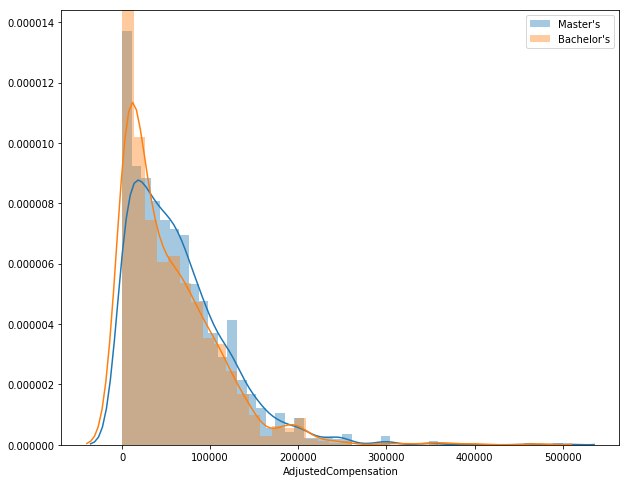

In [47]:
fig = plt.figure(figsize=(10,8))

sns.distplot(m2, label="Master's")
sns.distplot(b2, label="Bachelor's")
plt.legend();

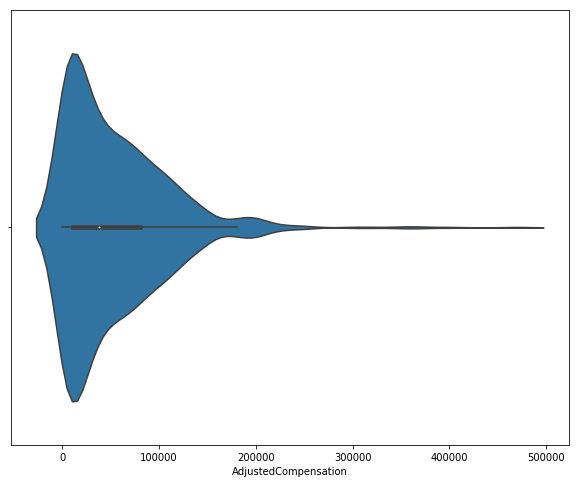

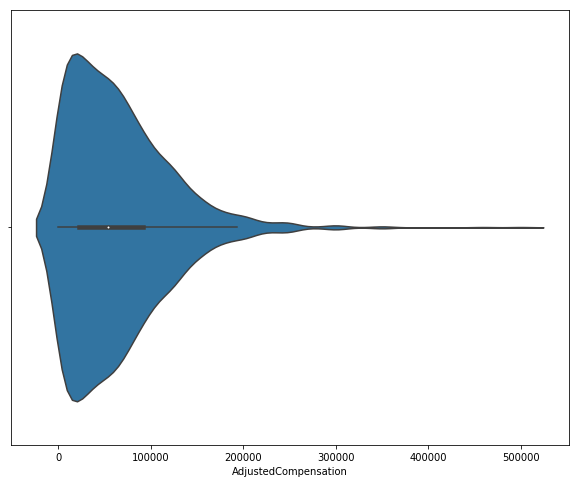

In [49]:
fig = plt.figure(figsize=(10,8))
sns.violinplot(b2)
plt.show()
fig = plt.figure(figsize=(10,8))
sns.violinplot(m2)
plt.show()

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [11]:
#Your code here


Median Values: 
s1:74131.92 
s2:38399.4
Sample sizes: 
s1: 967 
s2: 1107
Welch's t-test p-value: 0.1568238199472023


Repeated Test with Ouliers Removed:
Sample sizes: 
s1: 964 
s2: 1103
Welch's t-test p-value with outliers removed: 0.0


In [53]:
docs = df[df.FormalEducation=="Doctoral degree"]["AdjustedCompensation"].dropna()
docs.describe()

count    9.670000e+02
mean     2.956618e+07
std      9.099981e+08
min     -7.351631e+01
25%      4.000000e+04
50%      7.413192e+04
75%      1.200000e+05
max      2.829740e+10
Name: AdjustedCompensation, dtype: float64

In [54]:
print(p_value(bachelors, docs))

0.1568238199472023


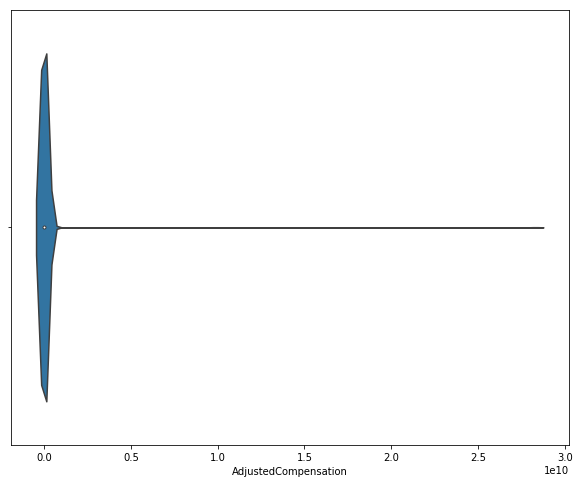

In [57]:
fig = plt.figure(figsize=(10,8))
sns.violinplot(docs);

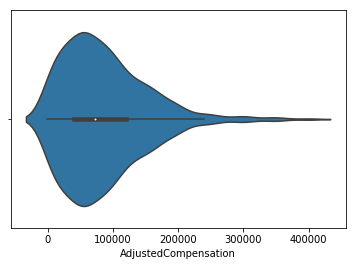

In [65]:
d2 = docs[docs <= 500000]
sns.violinplot(d2);

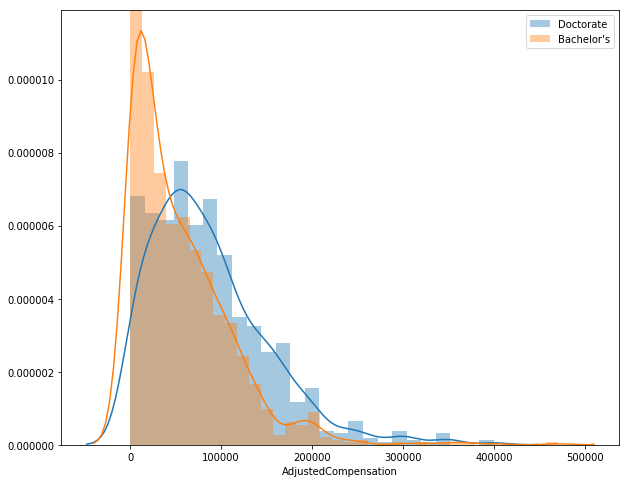

In [67]:
fig = plt.subplots(figsize=(10,8))
sns.distplot(d2, label="Doctorate")
sns.distplot(b2, label="Bachelor's")
plt.legend();

In [69]:
d2.describe()

count       964.000000
mean      86194.981631
std       65298.893273
min         -73.516311
25%       39991.200000
50%       73152.770000
75%      120000.000000
max      400000.000000
Name: AdjustedCompensation, dtype: float64

In [68]:
print(p_value(d2, b2))

0.0


## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [70]:
#Your code here
import statsmodels.api as sm
from statsmodels.formula.api import ols


/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [71]:
formula = "AdjustedCompensation ~ C(FormalEducation)"
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df         F    PR(>F)
C(FormalEducation)  6.540294e+17     6.0  0.590714  0.738044
Residual            7.999414e+20  4335.0       NaN       NaN


In [72]:
df2 = df[df["AdjustedCompensation"]<=500000]
df2.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,250000.0
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.802310,64184.8
9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017402,20882.4
11,Male,India,27.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015620,1483.9
14,Male,Taiwan,26.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033304,36634.4


In [73]:
formula = "AdjustedCompensation ~ C(FormalEducation)"
lm = ols(formula, df2).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df          F        PR(>F)
C(FormalEducation)  5.841881e+11     6.0  29.224224  1.727132e-34
Residual            1.439270e+13  4320.0        NaN           NaN


## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!